In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [3]:
# Importing The datset

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [5]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [6]:
#Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# Future observations will not have any truncated information being displayed.

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df.shape

(32560, 15)

In [12]:
# Checking for any null values

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
# Checking for the datatype

In [15]:
# object data type
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [16]:
#  float data type
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
print(f"\nFloat Data Type Columns are: ", integer_datatype)


Float Data Type Columns are:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [17]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [18]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (32560, 15)
Rows and Columns after dropping duplicates:  (32536, 15)


In [19]:
# The drop_duplicates option is getting rid of all the duplicate values rows present in our dataset.

In [20]:
df.nunique().to_frame("Unique Values")

Unique Values
Age                        73
Workclass                   9
Fnlwgt                  21647
Education                  16
Education_num              16
Marital_status              7
Occupation                 15
Relationship                6
Race                        5
Sex                         2
Capital_gain              119
Capital_loss               92
Hours_per_week             94
Native_country             42
Income                      2

In [21]:
# Lists of  the number of all the unique data present in dataset.

In [22]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*80)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

In [23]:
# Lisiting out the column names for object datatype and integer datatype

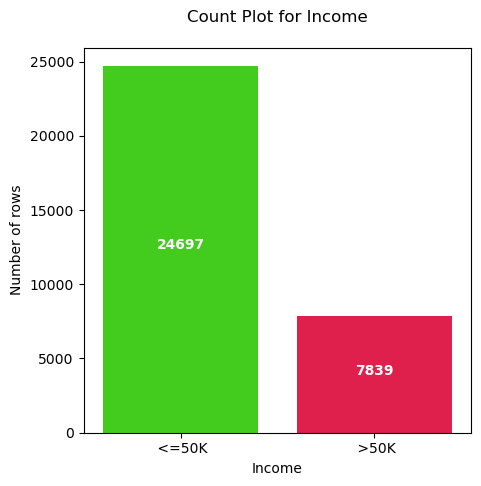

In [24]:
#Visualize the whether the income is above 50K or not
try:
    plt.figure(figsize=(5,5))
    col_name = 'Income'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--Target label "Income" column has imbalaned dataset that will need to be taken care of before we start building our classification machine learning model.

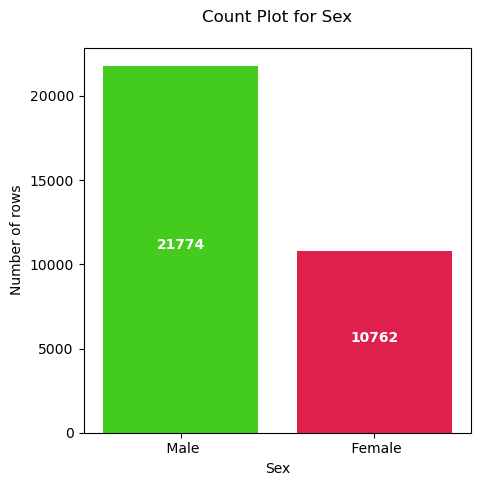

In [26]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Sex'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The number of data values for male is higher than that of it's female counterparts.

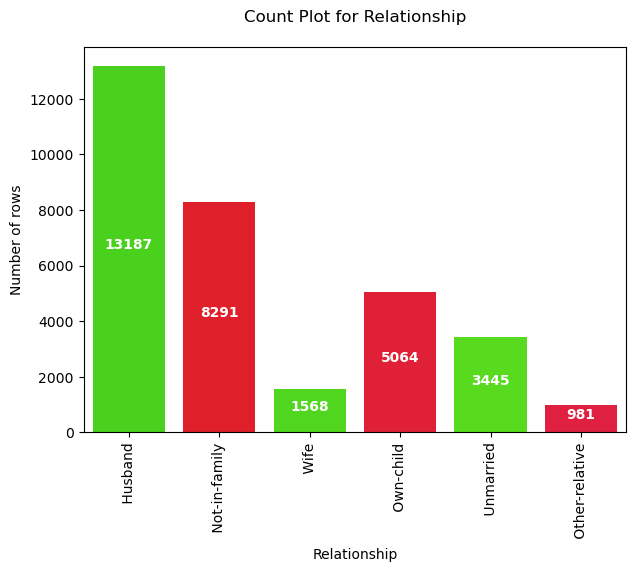

In [28]:
try:
    plt.figure(figsize=(7,5))
    col_name = 'Relationship'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The "Relationship" status the values for husband is the highest and other relative has the lowest data.

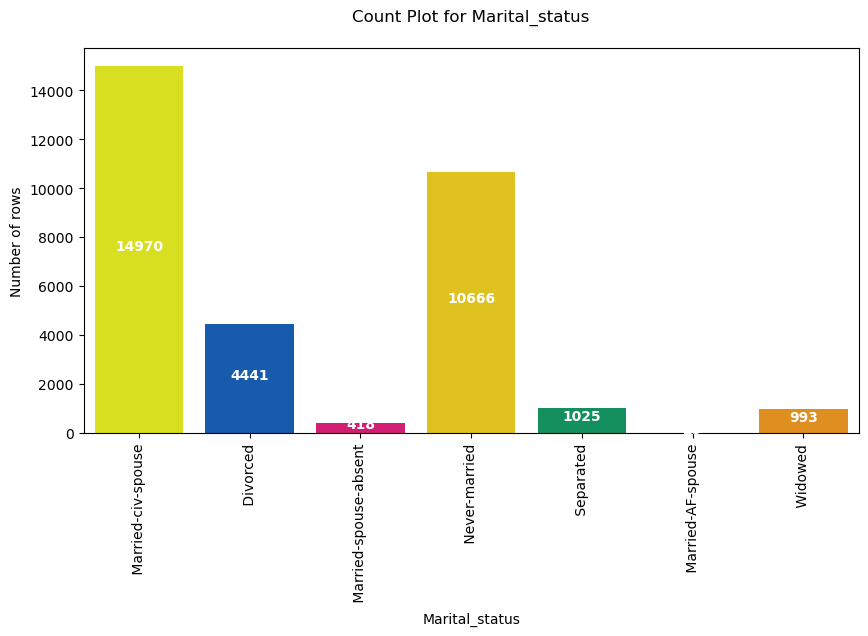

In [30]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Marital_status'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings-- Marital Status column has married spouse and never married people on the higher edge as compared to the other values.

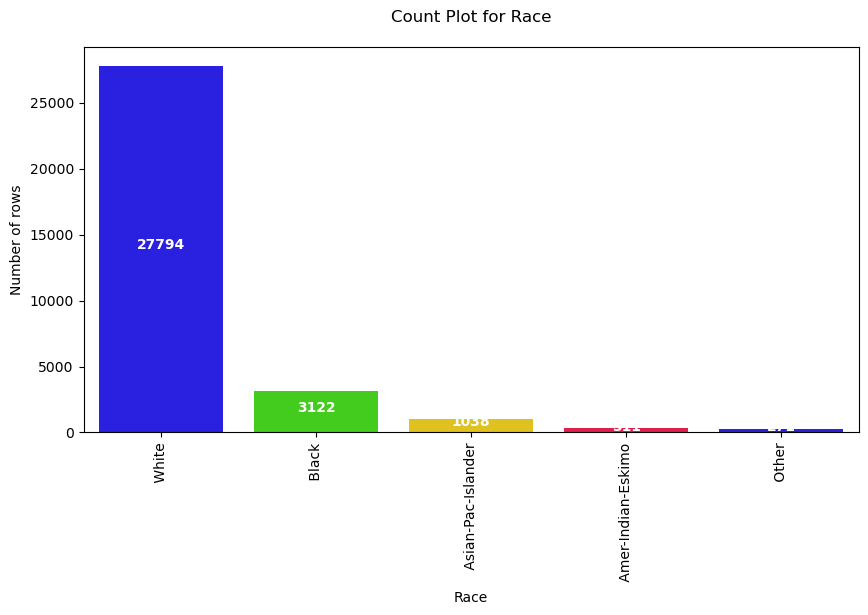

In [32]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Race'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The Race column mostly comprises of White people in the dataset.

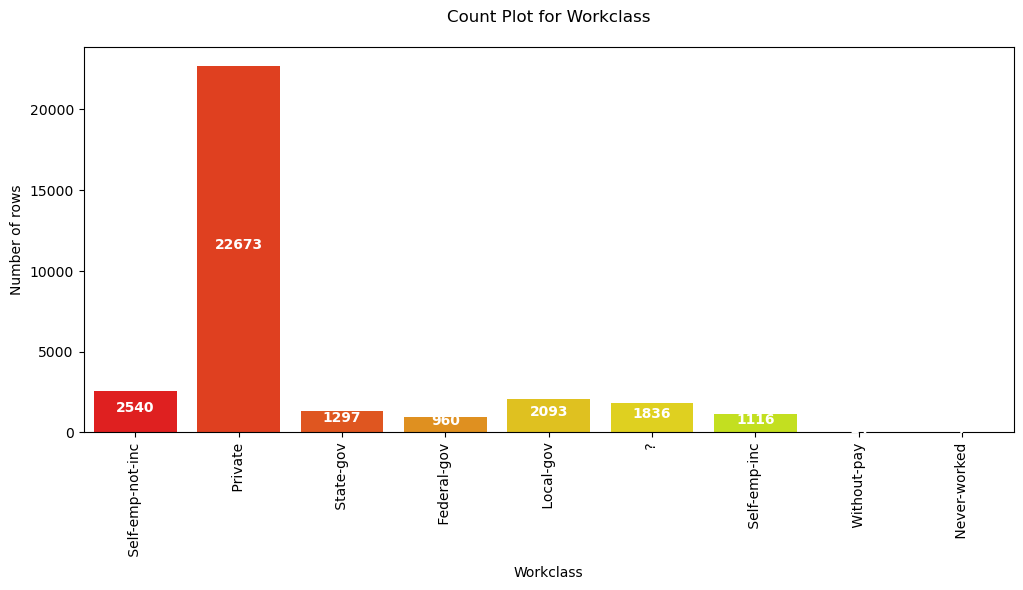

In [34]:
try:
    plt.figure(figsize=(12,5))
    col_name = 'Workclass'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The Work Class column the highest number of people work for private sector and the other work classes or people who are unemployed is quite less to negligible.

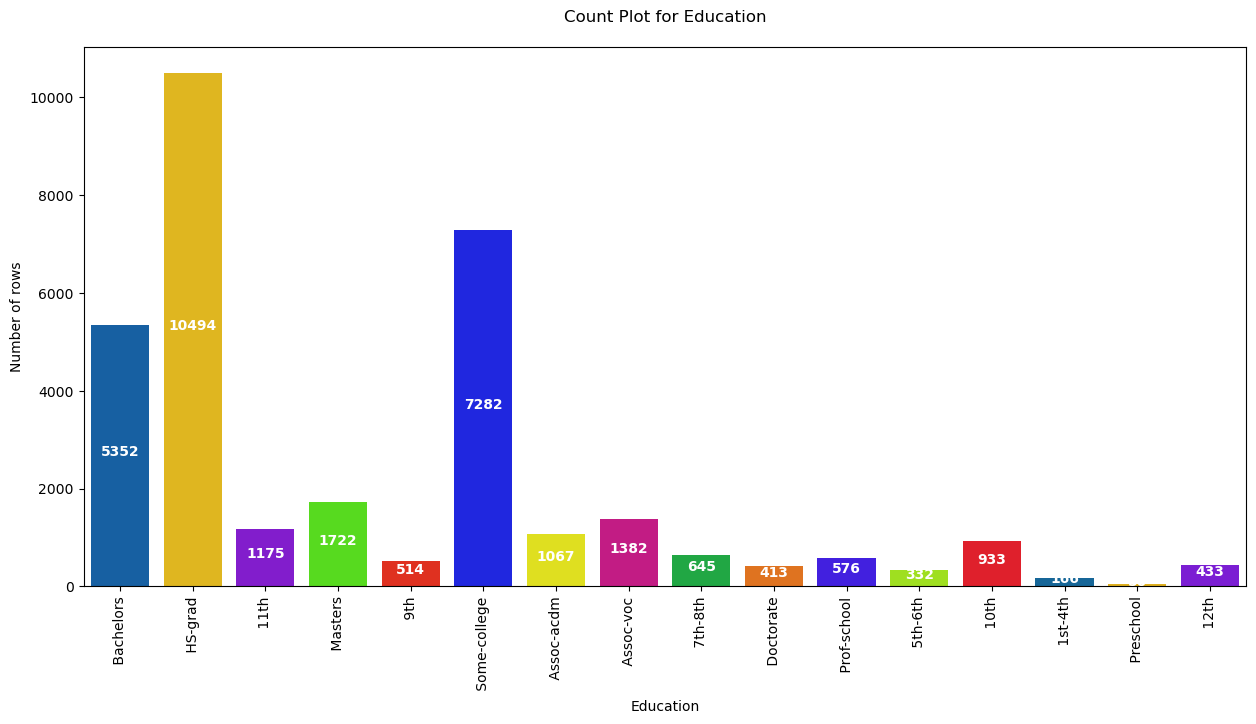

In [36]:
try:
    plt.figure(figsize=(15,7))
    col_name = 'Education'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The Education column has the highest number of values in HS grad followed by Some college and Bachelors. Remaining education categories have quite lesser data coverage in our dataset.

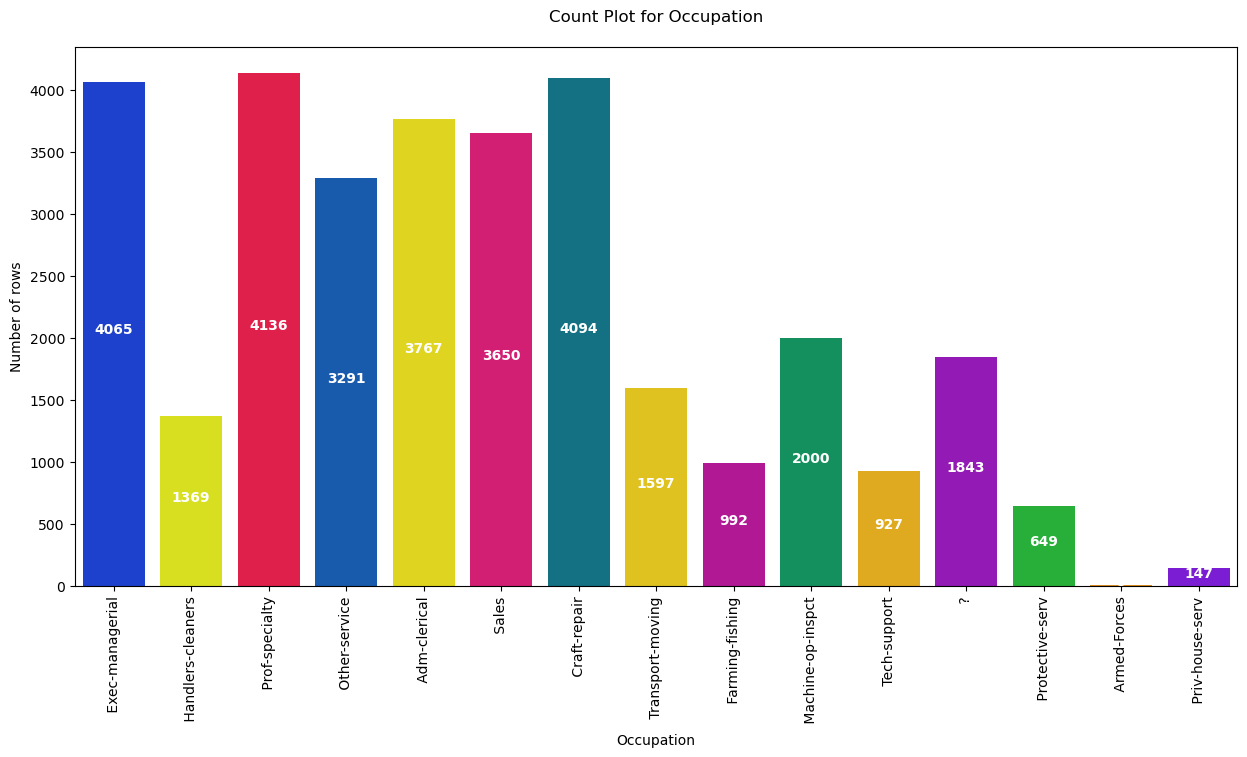

In [38]:
try:
    plt.figure(figsize=(15,7))
    col_name = 'Occupation'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The Occupation column has various categories out of which people in Armed Forces are the least and folks engaged in some craft repair, executive managers and holding some professional speciality are on the rise.

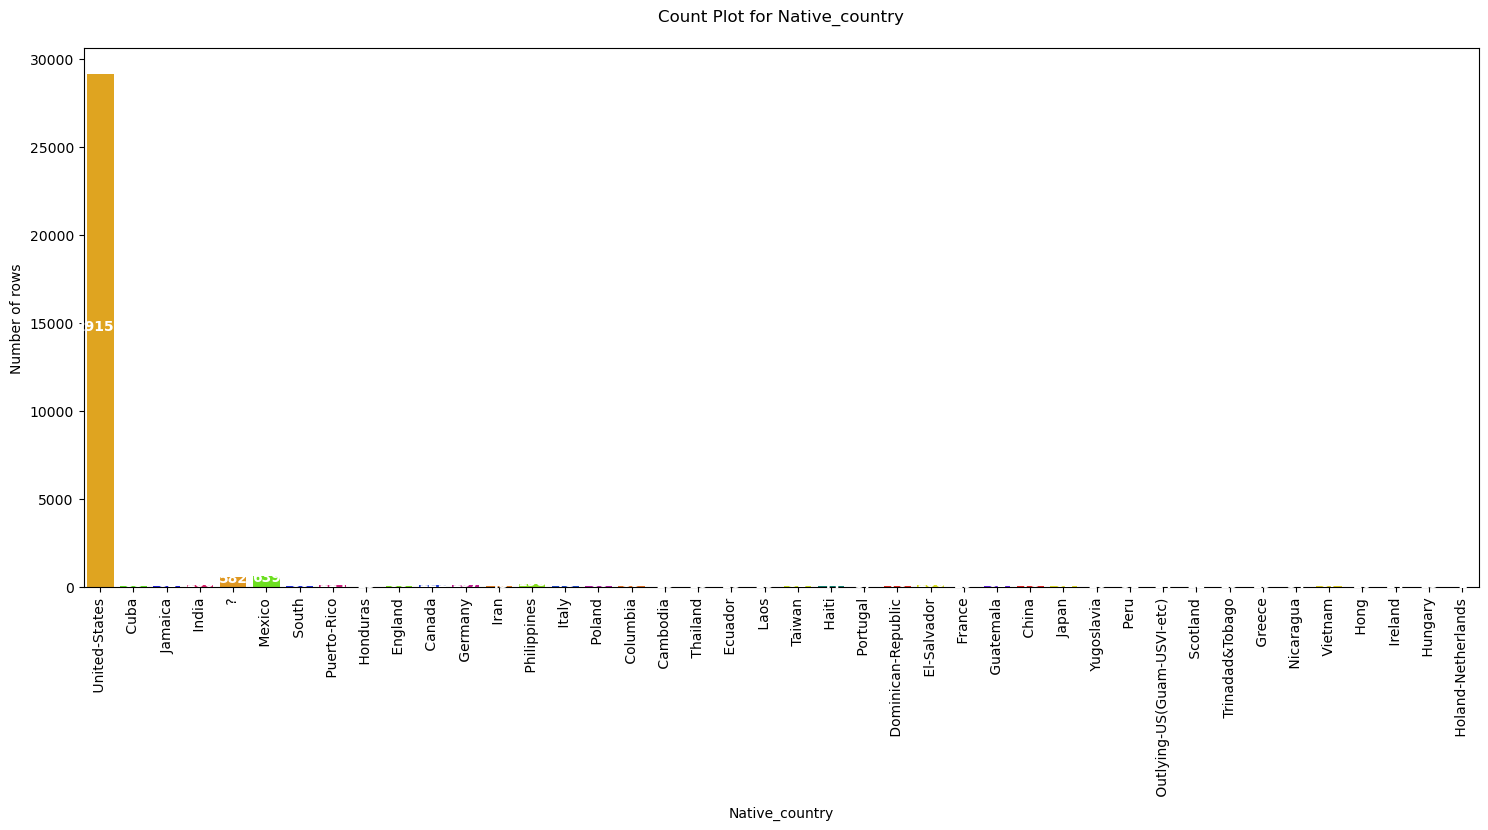

In [40]:
try:
    plt.figure(figsize=(18,7))
    col_name = 'Native_country'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Findings--The Native Country column has the highest value for US followed by Mexico and Others while the remaining categories has the least to neligible amount of data coverage.

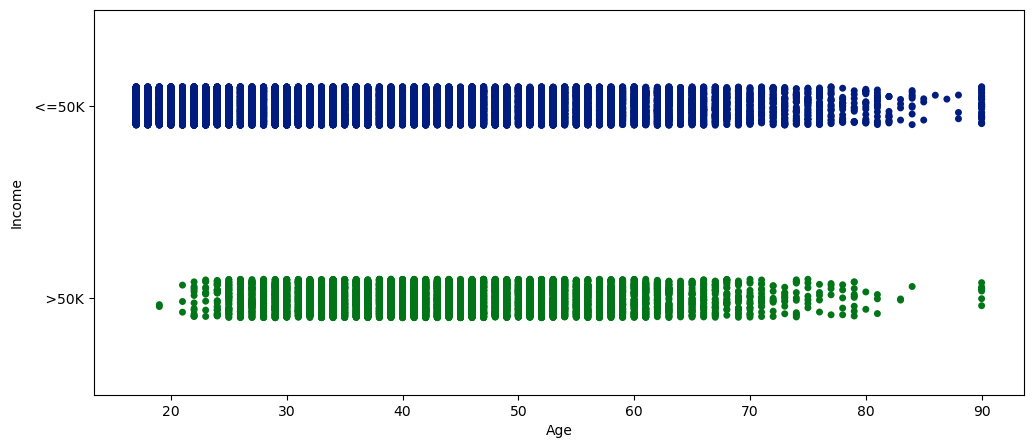

In [42]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

In [43]:
Findings--Young people hardly have income more than 50K.

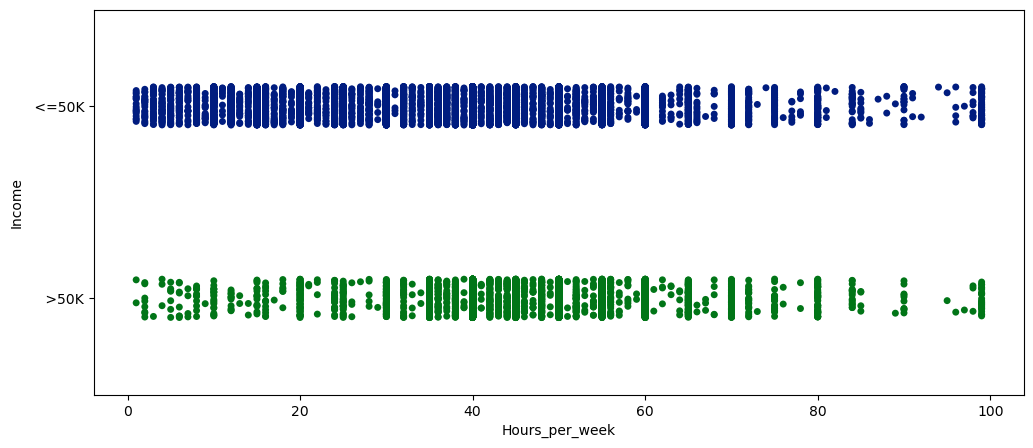

In [44]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

Findings--People who have income less than or equal to 50K put in more hours per week as compared to the one's who earn more than 50K as income.

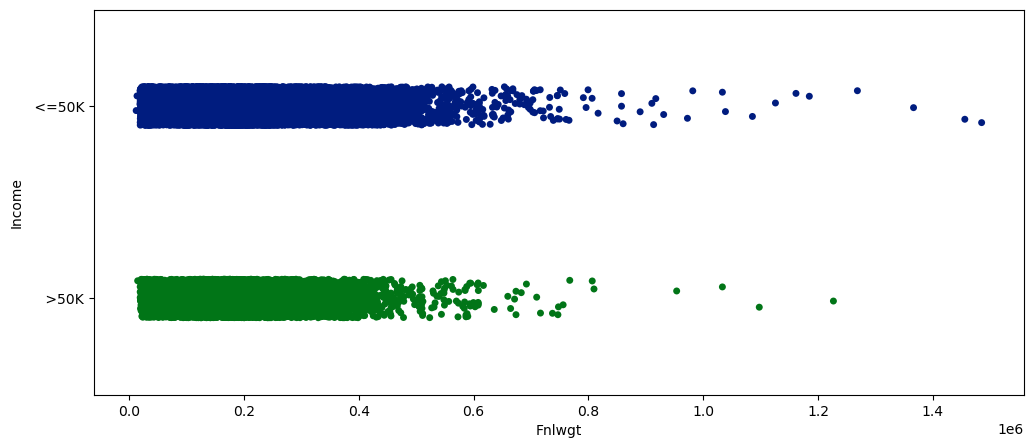

In [46]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

In [47]:
Findings--Final weight has data coverage on a higher scale for people in the <=50K income bracket as compared to the people in >50K income bracket.

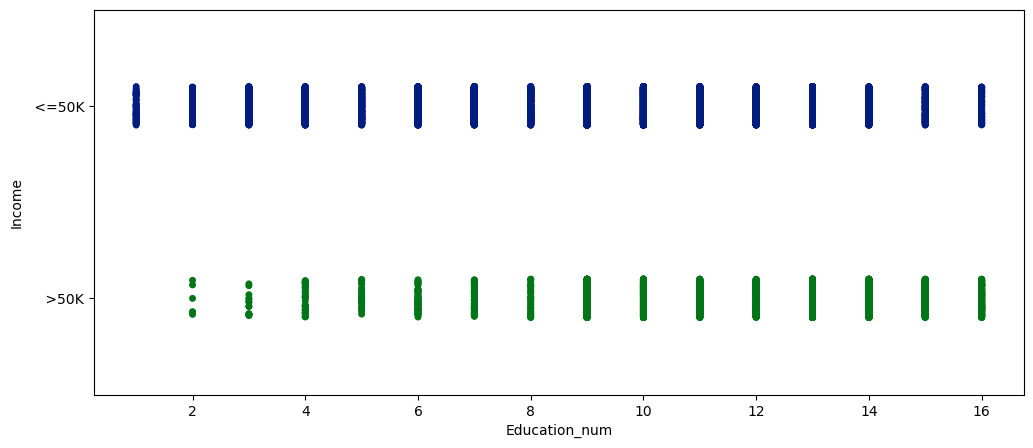

In [48]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

Findings-- The lower education number is almost negligibe for people with income >50K and it therefore emphasizes on the importance of education too.

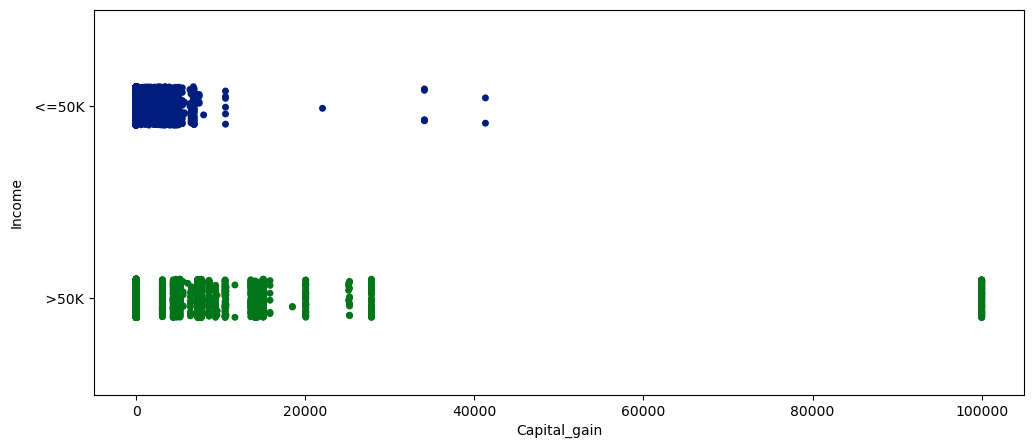

In [50]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_gain', y = 'Income', data=df)
plt.show()

In [51]:
Findings--The capital gain is on a higher scale for people with income >50K

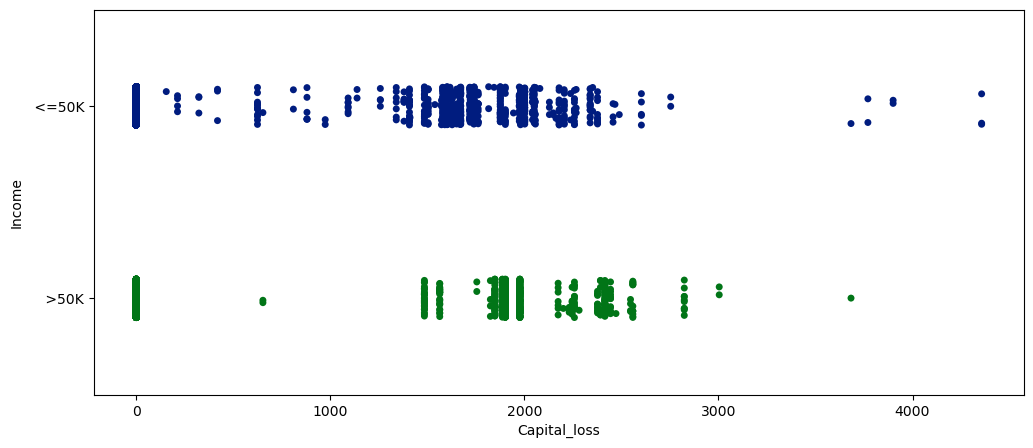

In [52]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

In [53]:
Findings--The capital loss for people with income >50K is considerably less than people with income <=50K

Text(0, 0.5, 'Percentage of People')

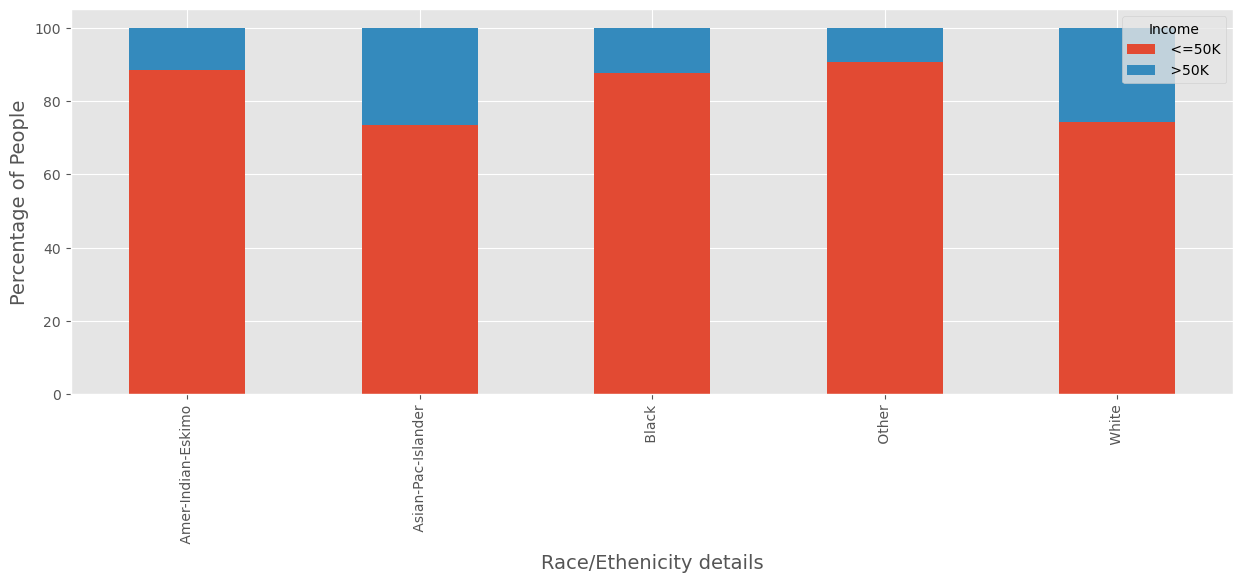

In [54]:
plt.style.use('ggplot')
tbl = pd.crosstab(df['Race'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Race/Ethenicity details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us different ethenicity race group folks and the income variations between them.

Text(0, 0.5, 'Percentage of People')

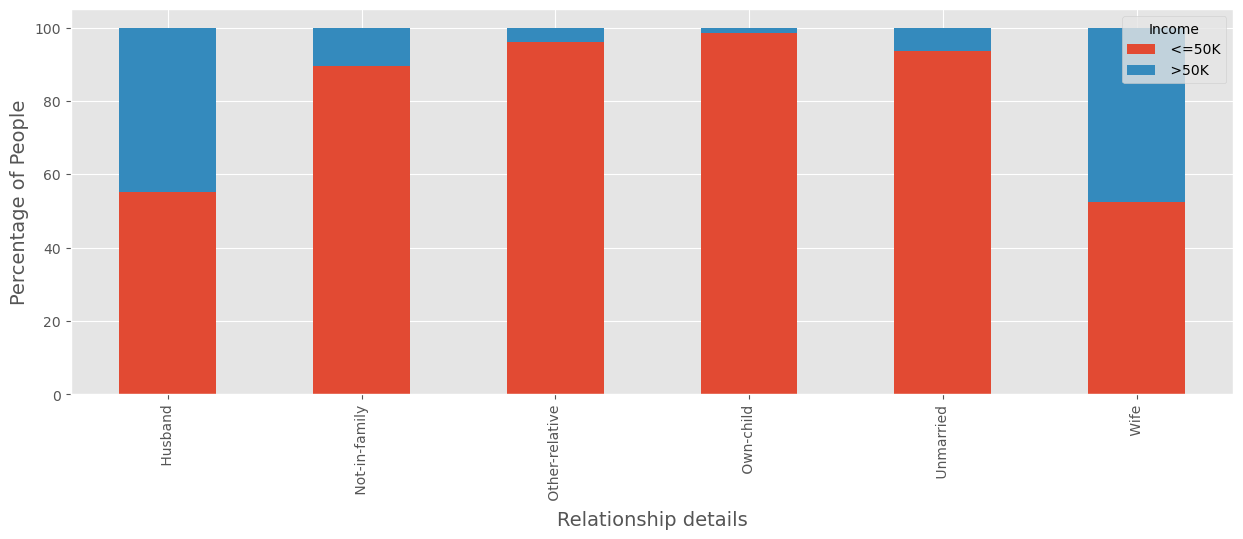

In [56]:
tbl = pd.crosstab(df['Relationship'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Relationship details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us the difference in income details for people in different relationship status. People who are earning >50K are mostly from the relationship status husband or wife.

Text(0, 0.5, 'Percentage of People')

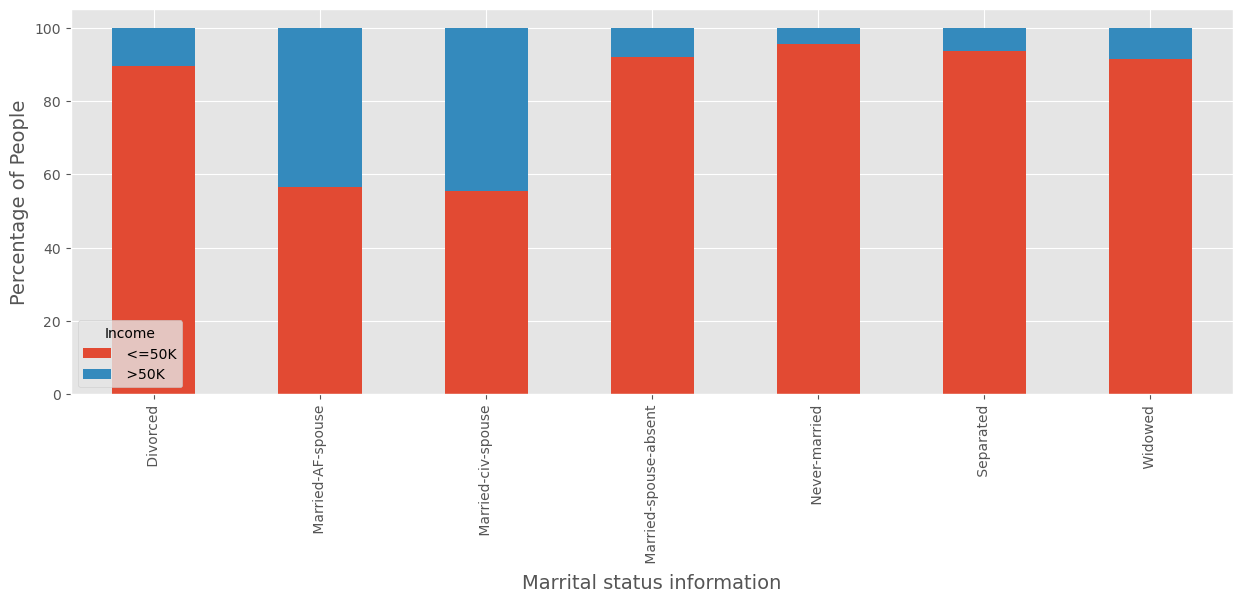

In [58]:
tbl = pd.crosstab(df['Marital_status'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Marrital status information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

In [59]:
Findings--The above cross tab bar plot shows us the marrital status of people who have income either <=50K or >50K.

Text(0, 0.5, 'Percentage of People')

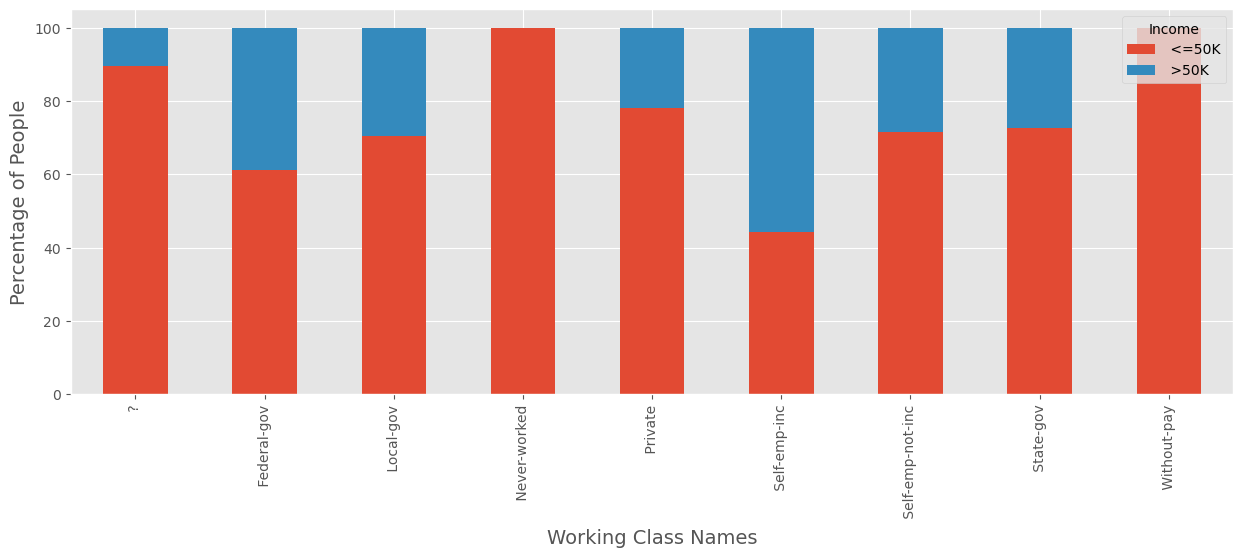

In [60]:
tbl = pd.crosstab(df['Workclass'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Working Class Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us the working class information and people who have never worked or are sitting without pay obviously come under <=50K income bracket while mostly people who are self employed or own a business are able to make an income of >50K.

tbl = pd.crosstab(df['Education_num'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education Number information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us the education number scale which indicated that to earn an income of >50K you need to have a higher educational number emphasizing the importance on the educational front.

Text(0, 0.5, 'Percentage of People')

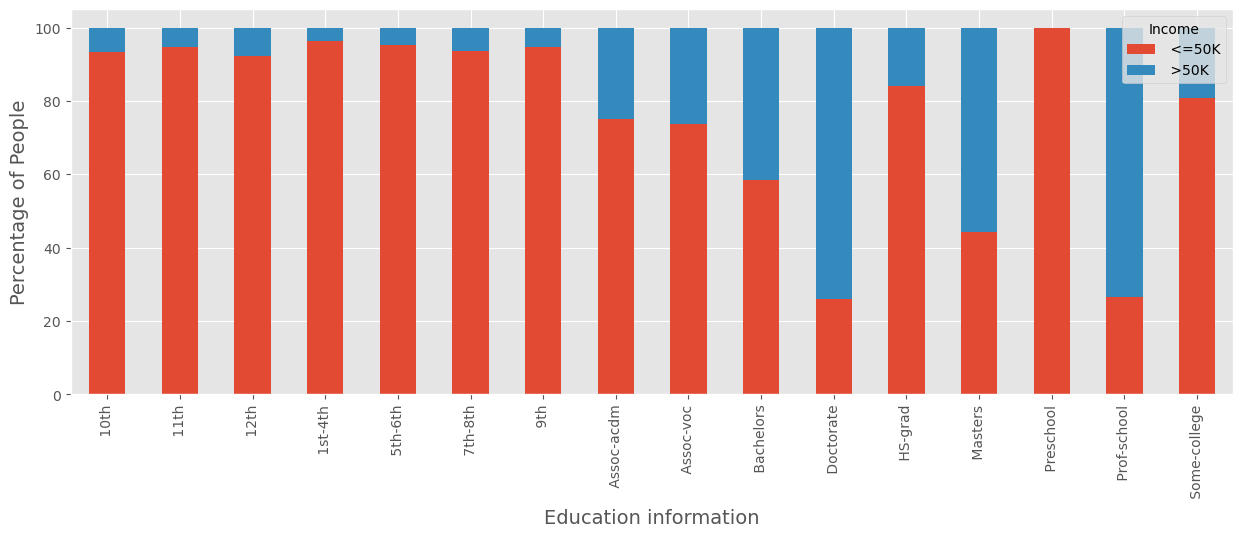

In [64]:
tbl = pd.crosstab(df['Education'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us the different education types for people and their income scale. It looks like people with >50K income have a qualification in doctorate, masters and professional school. 

Text(0, 0.5, 'Percentage of People')

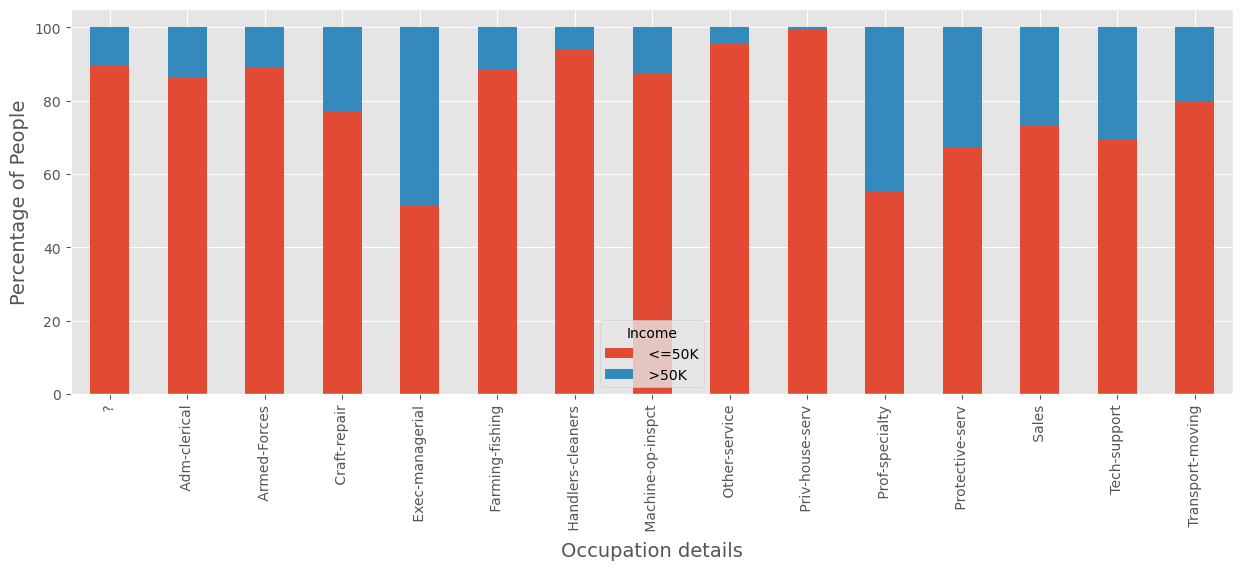

In [66]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Occupation details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings-- The above cross tab bar plot shows us all the occupation information for people and to earn an income of >50K the designations which help are executive managerial position, professional speciality position, protective services, technical support position and sales positions.

Text(0, 0.5, 'Percentage of People')

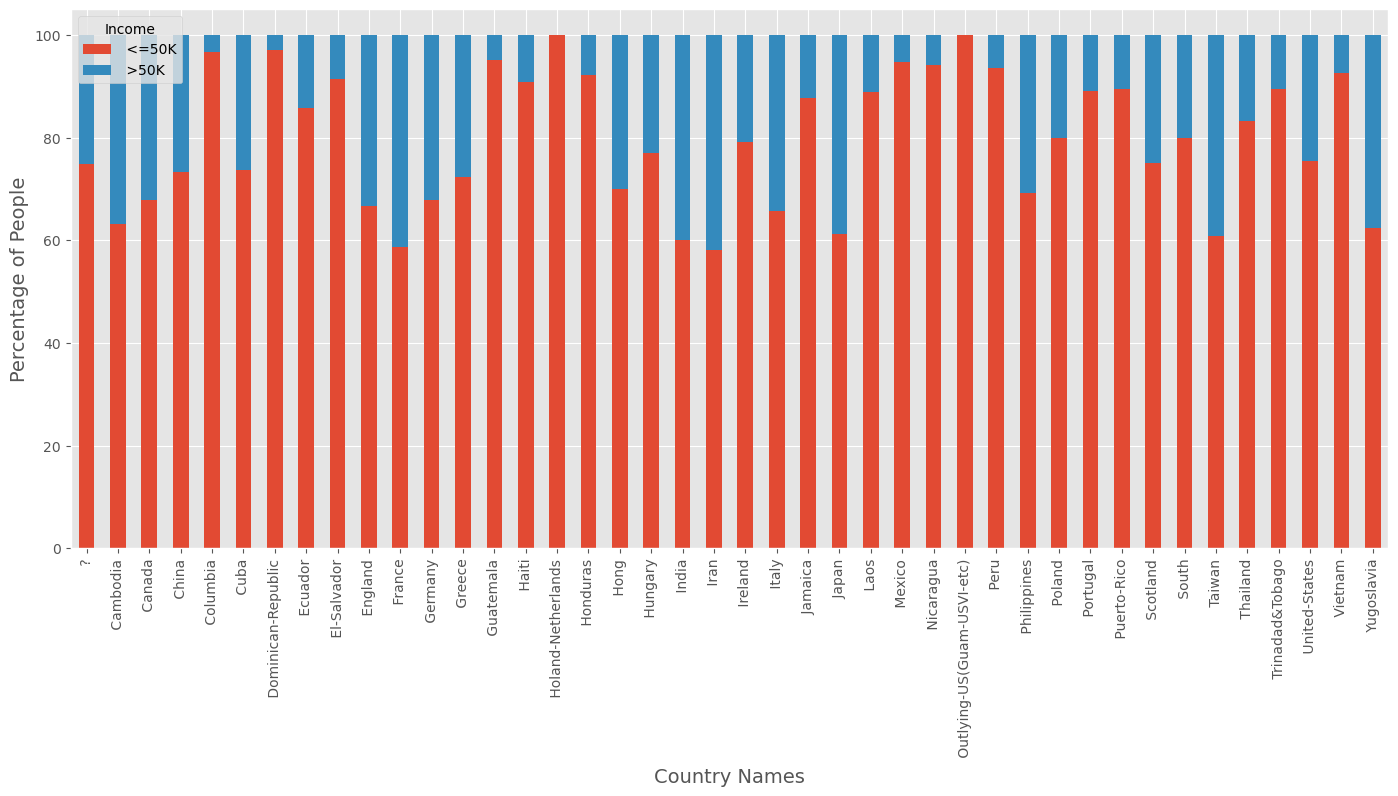

In [68]:
tbl = pd.crosstab(df['Native_country'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(col_name).plot(kind='bar',stacked=True,figsize=(17,7))
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us the native country details for people settled in the US. In order to earn >50K the native country details recorded are for Cambodia, Canada, France, Germany, Greece, Hong Kong, India, Iran, Italy, Japan, Phillipines, Taiwan, Yugoslavia.

Text(0, 0.5, 'Percentage of People')

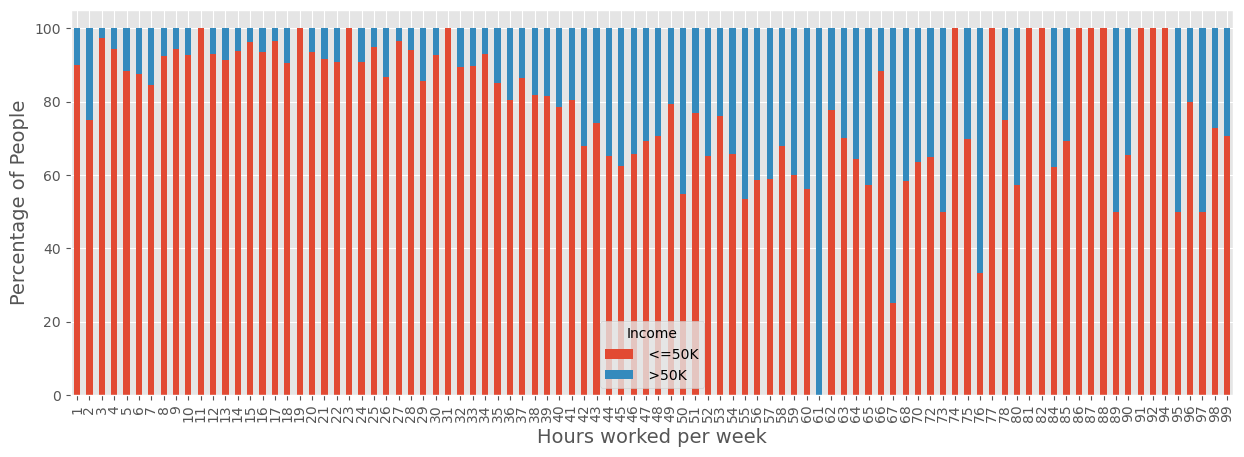

In [70]:
tbl = pd.crosstab(df['Hours_per_week'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Hours worked per week', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us that people with >50K income mostly work 61 hours per week or range from 50-80 hours per week mostly.

Text(0, 0.5, 'Percentage of People')

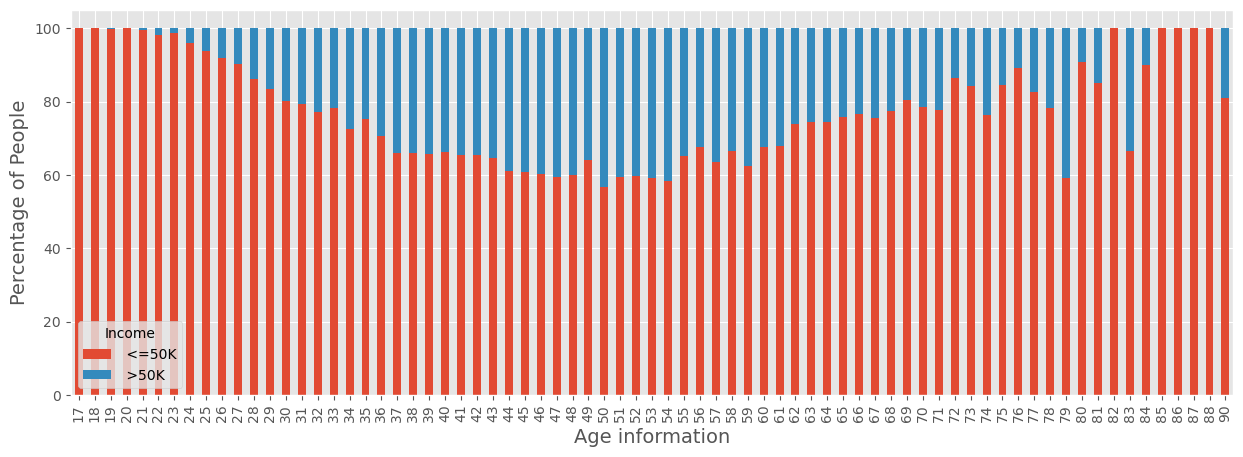

In [72]:
tbl = pd.crosstab(df['Age'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Age information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Findings--The above cross tab bar plot shows us that younger people mostly have an income of <=50K and older people generally have an income of >50K.

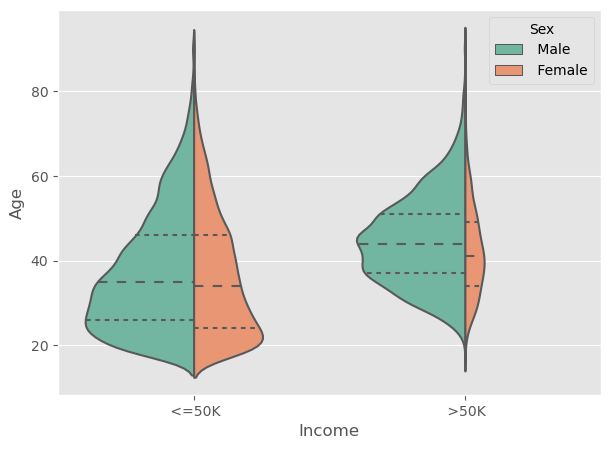

In [74]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Findings-- Male in any age group and income group have a higher number than their female counterparts.

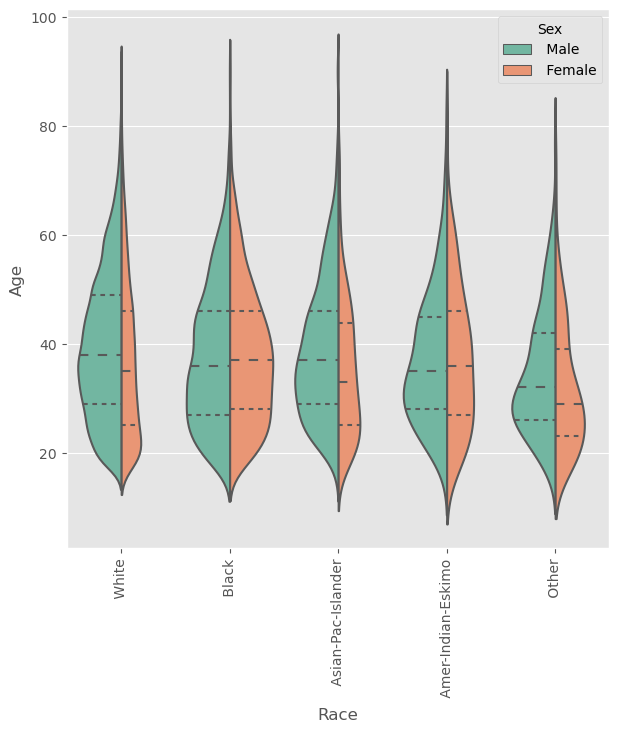

In [76]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Findings--Female with black ethinicity of any age group is higher than the other ethinicity group females.

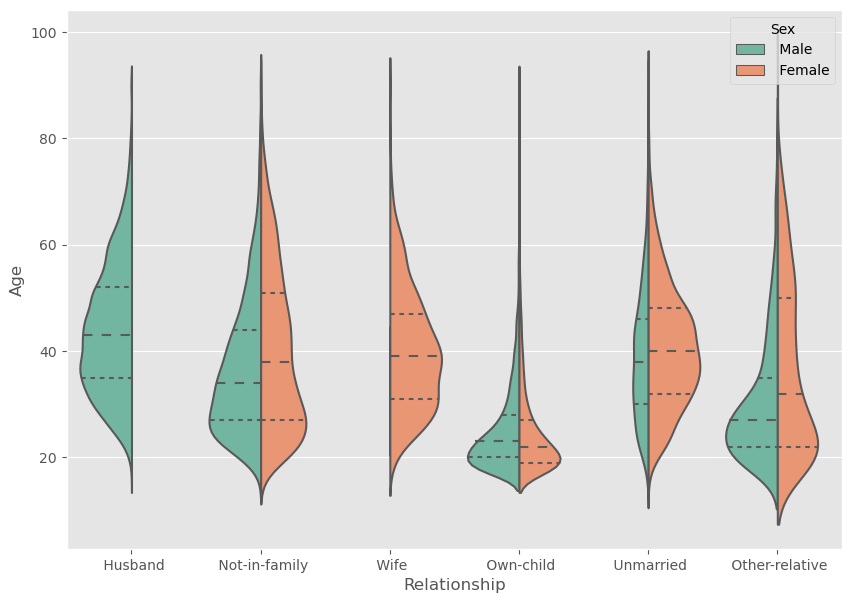

In [78]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In [79]:
Findings-- People in the own child relationship age from 10-40. Also we have female who are unmarried more than the male counter parts.

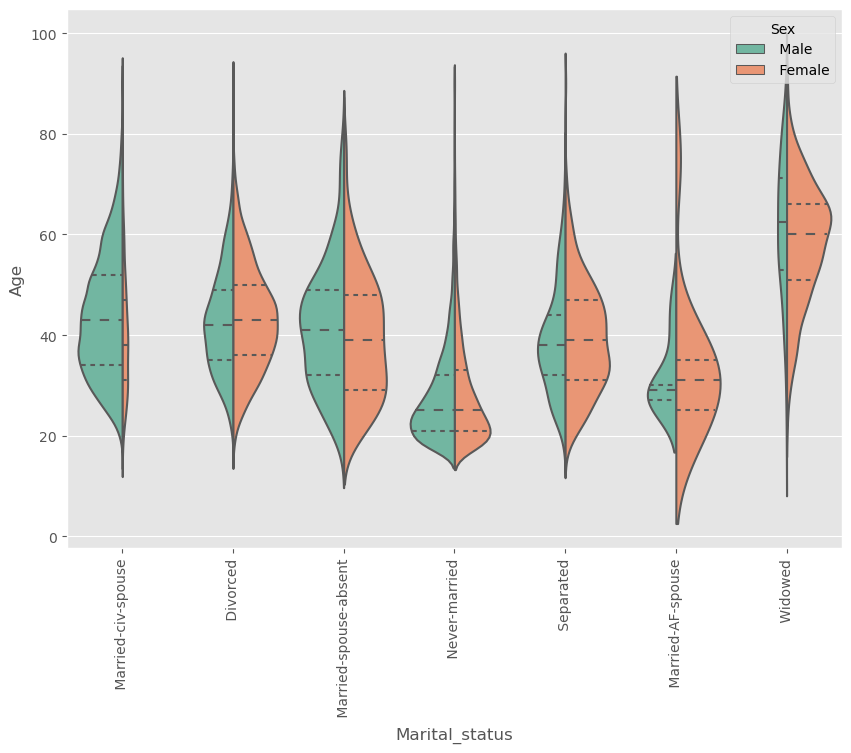

In [80]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Findings-- The marital status as married spouse have a higher number in male than in female and people who are widowed have a higher number in females as compared to the males.

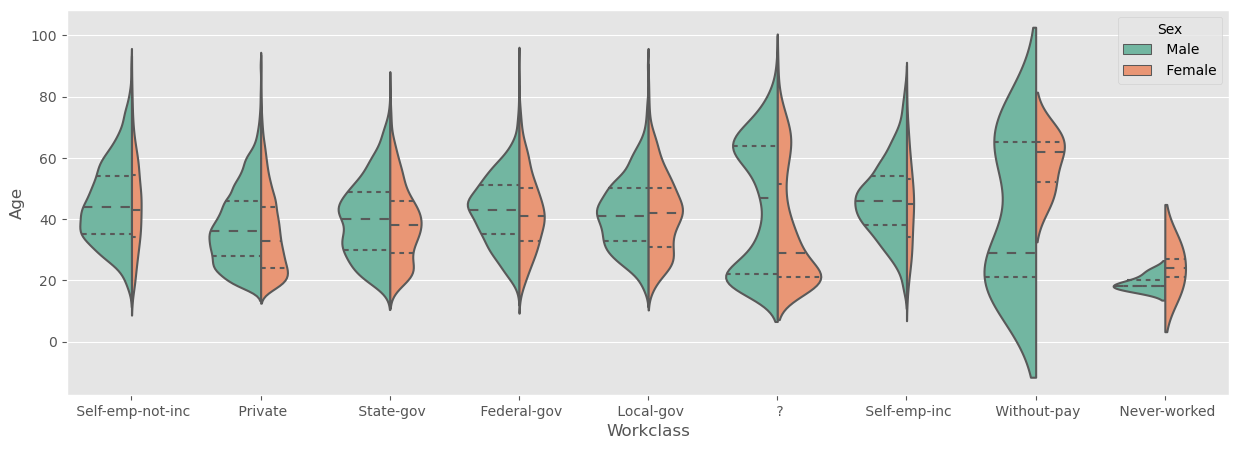

In [82]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Findings-- Above violin plot shows us that male cover most of the working class sectors in each category as compared to the females.

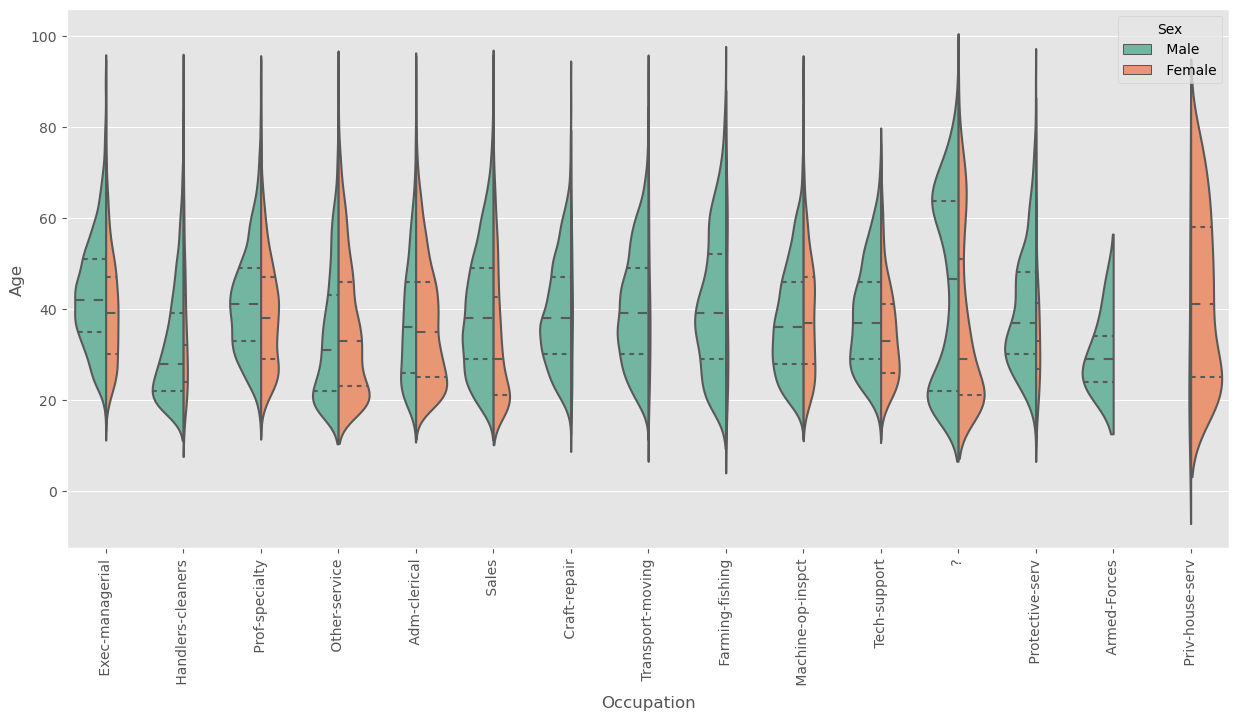

In [84]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Findings--The designation of private house services has more number of female mostly from the 20-60 age group while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number of data coverage for males.

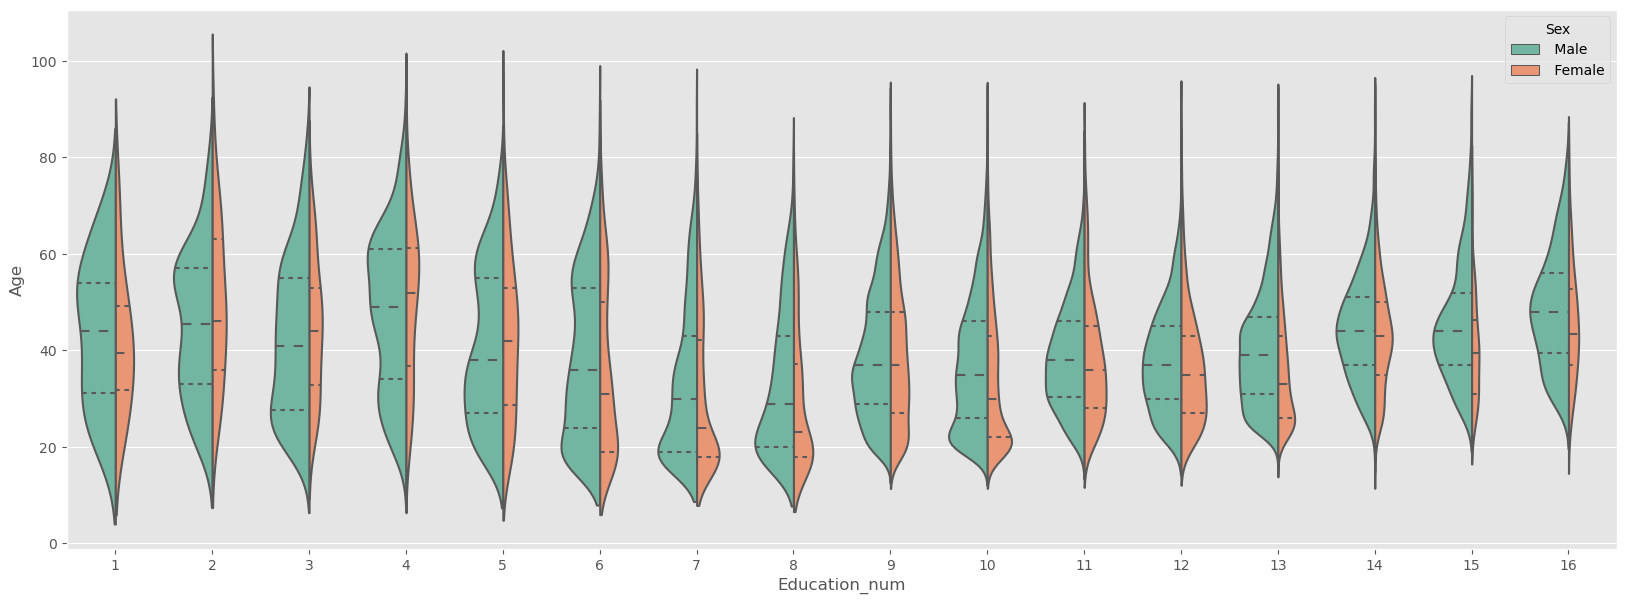

In [86]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Findings--Males in all age group have a higher education number compared to their female counter parts.

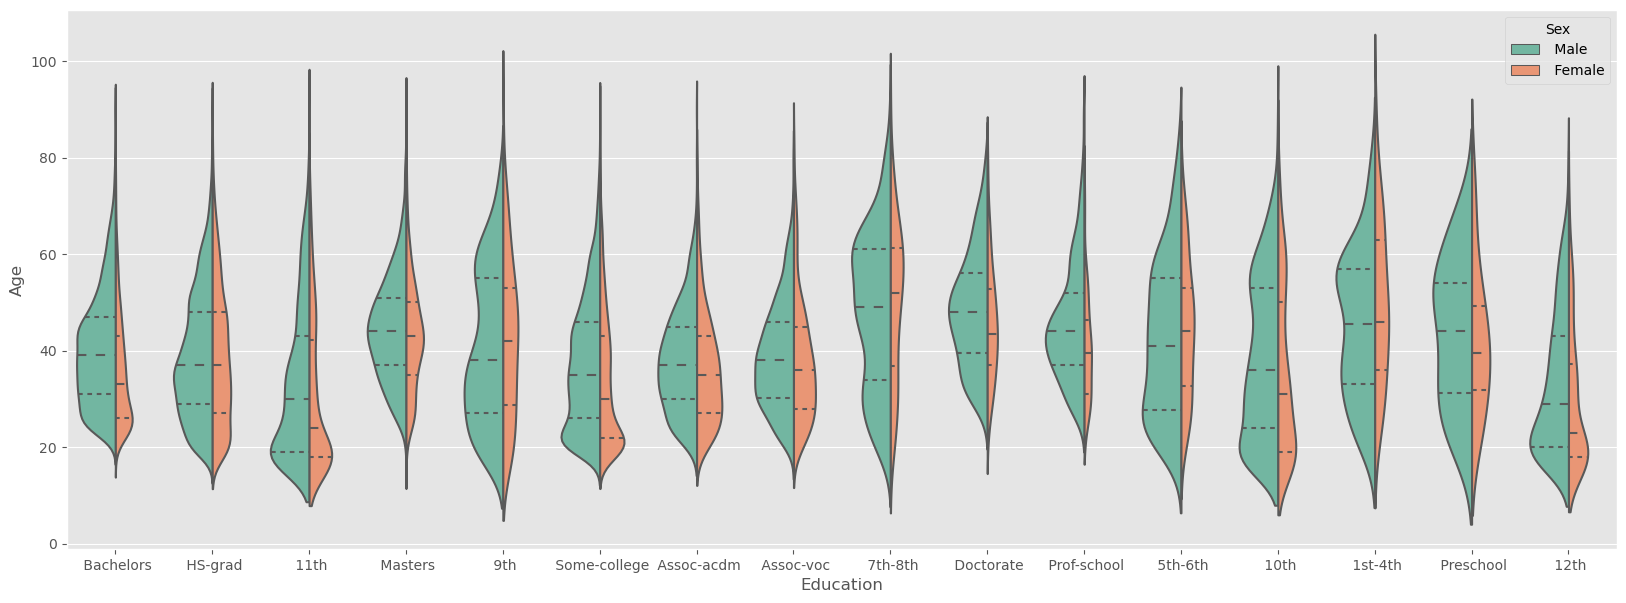

In [88]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Findings--Like the education number the education category sees more number of males than their female counter parts.

In [90]:
# Label Encoder

le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States       0  
1             0             0              40   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40            Cuba       0  
4             0             0              40   United-States       0

In [91]:
#Used LabelEncoder --> To convert the object data type in our label column "Income" (target) to a numerical format.

In [92]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        6.0   83311        9.0             13             2.0   
1   38        4.0  215646       11.0              9             0.0   
2   53        4.0  234721        1.0              7             2.0   
3   28        4.0  338409        9.0             13             2.0   
4   37        4.0  284582       12.0             14             2.0   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0         4.0           0.0   4.0  1.0             0             0   
1         6.0           1.0   4.0  1.0             0             0   
2         6.0           0.0   2.0  1.0             0             0   
3        10.0           5.0   2.0  0.0             0             0   
4         4.0           5.0   4.0  0.0             0             0   

   Hours_per_week  Native_country  Income  
0              13            39.0       0  
1              40            39.0       0  
2              40            39.0       0  
3              40             5.0       0  
4              40            39.0       0

In [93]:
# Used one hot encoder here but I preferred to use OrdinalEncoder to ensure that the number of columns do not get increased unnecessarily.

In [94]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (32536, 15)


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [95]:
# Checking the number of rows and columns present in our dataset after applying the enconding techniques and ensuring that there are no null values present in them.

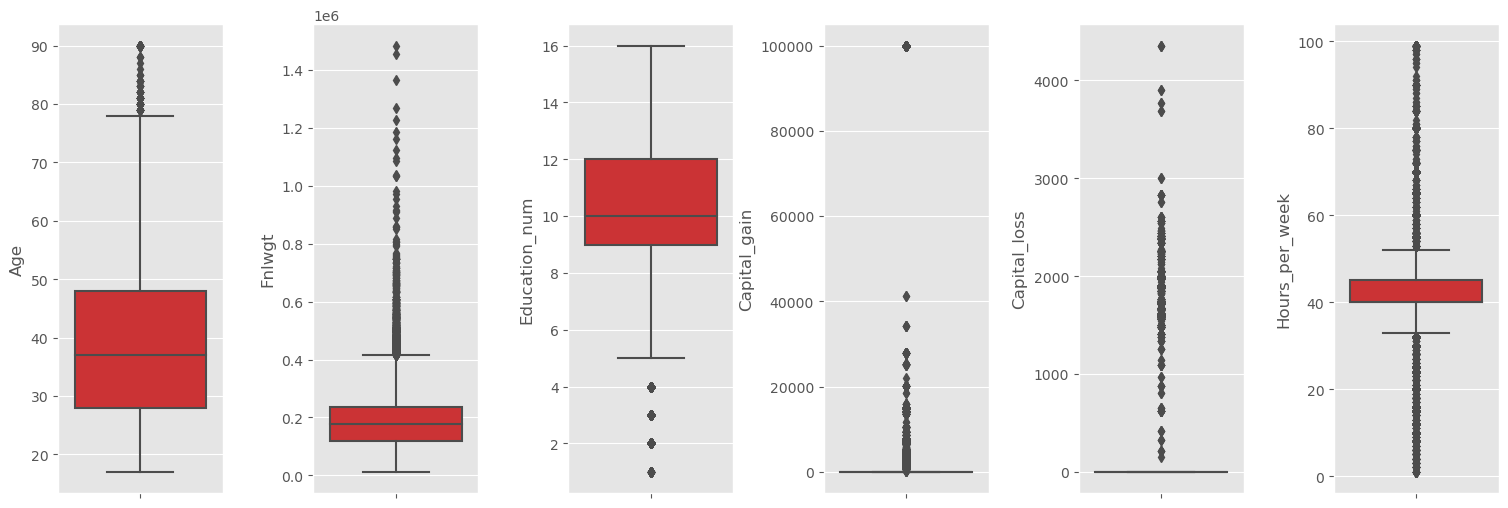

In [96]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [97]:
# There are outlier present in the numerical data columns which are need to be treated.

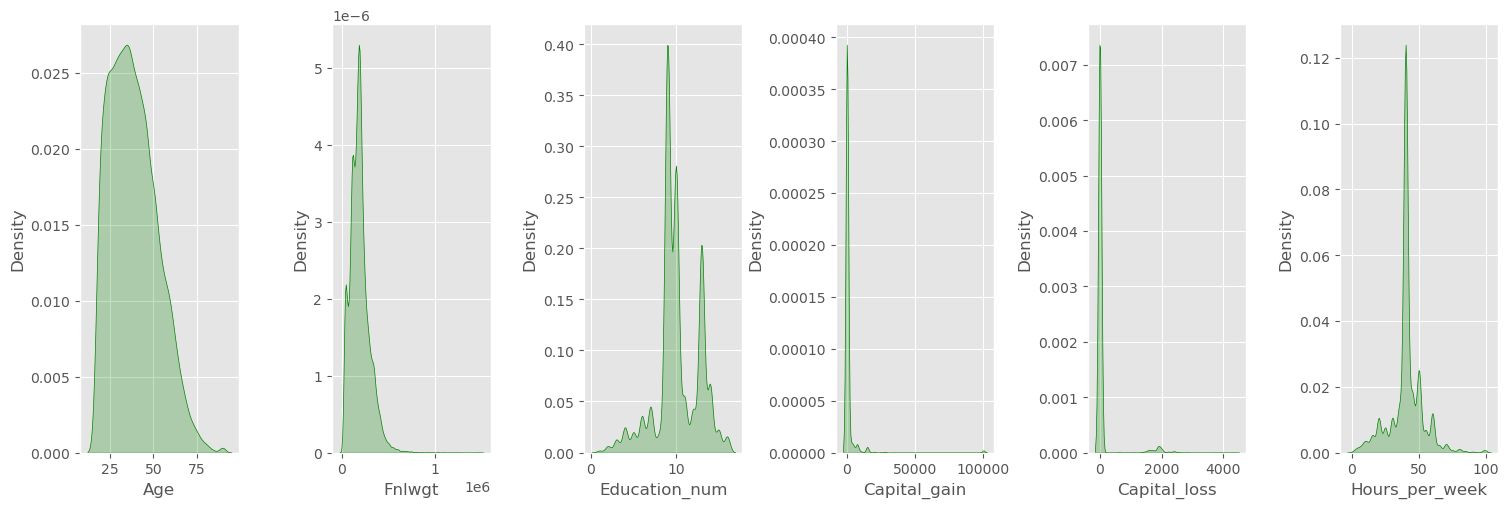

In [98]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Findings-- With the help of distribution plot we can see the skewness details present in numerical data columns which are to be treated.

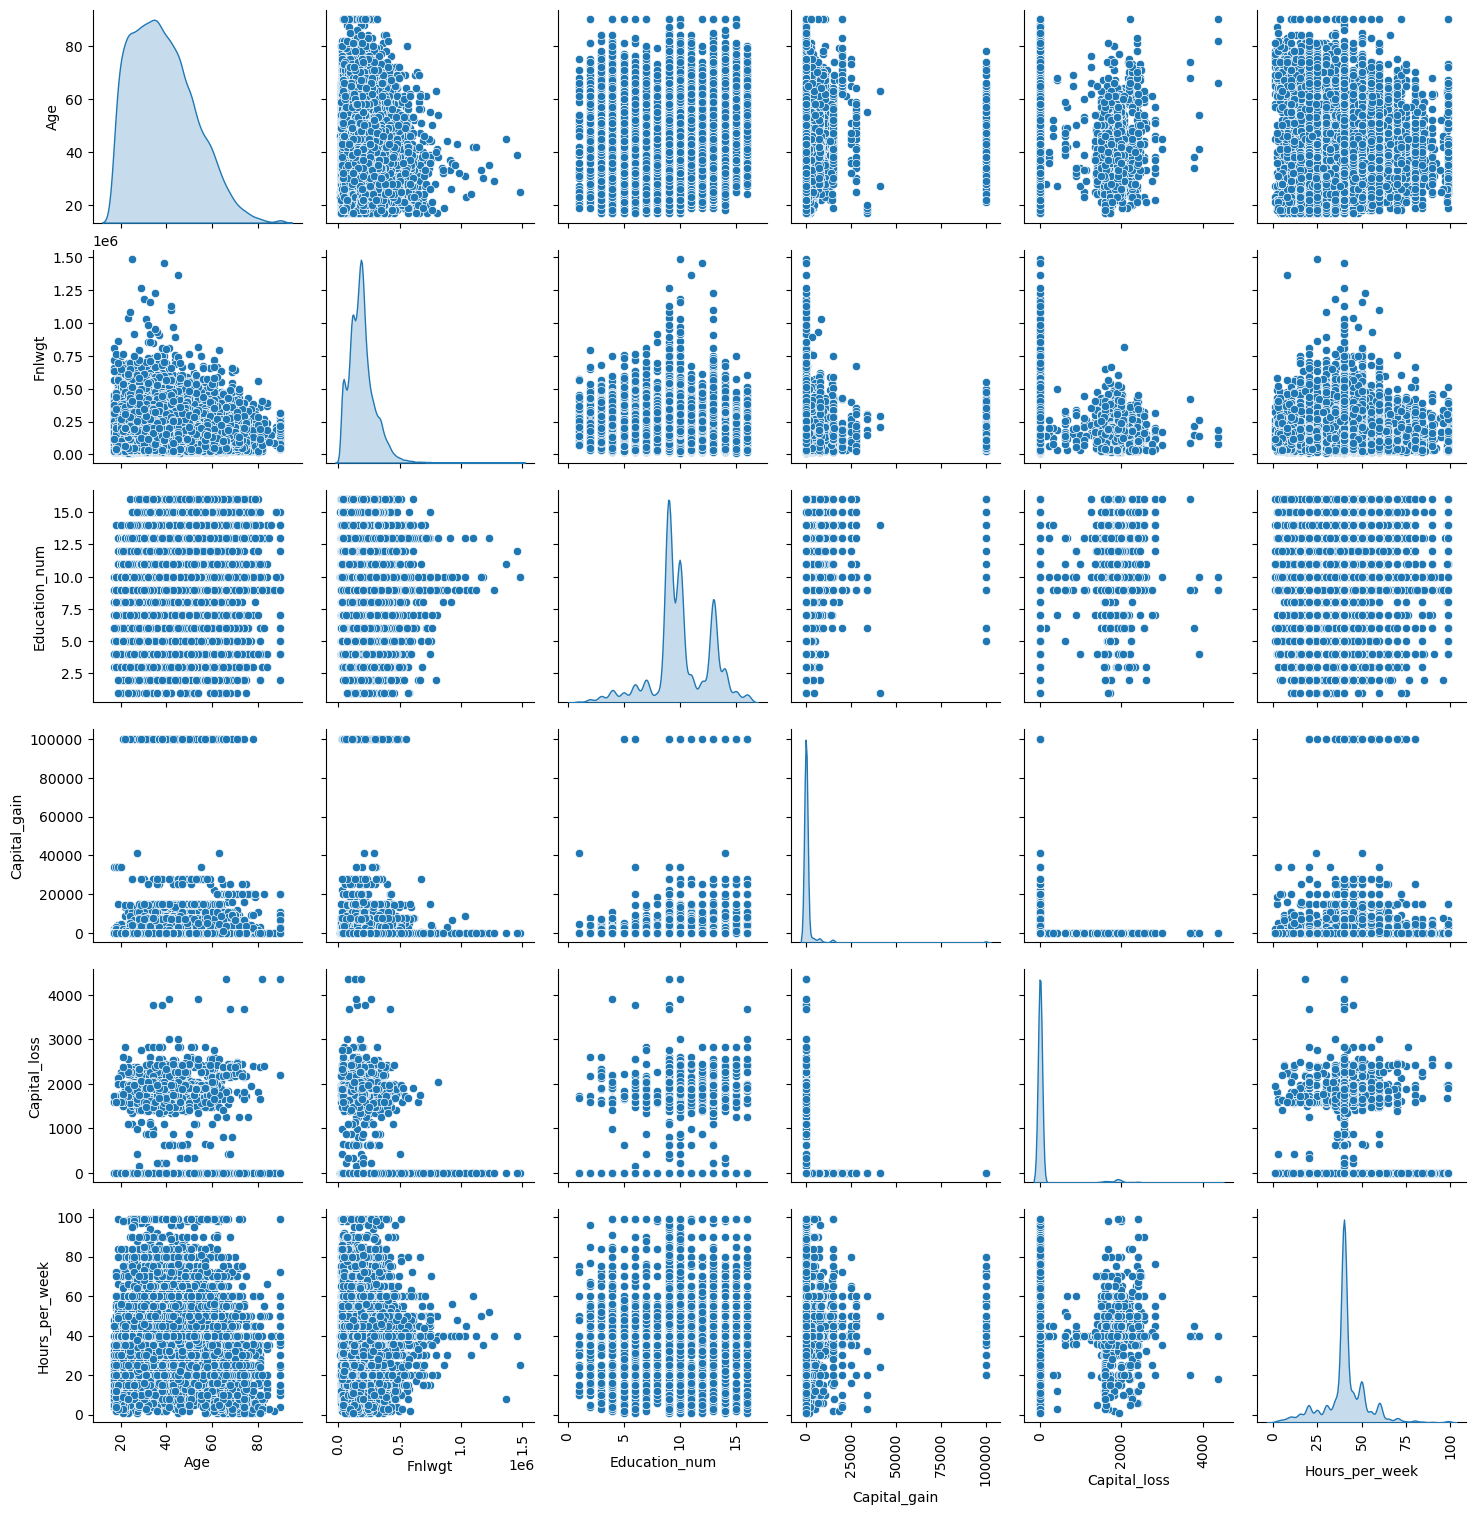

In [100]:
num_values = df.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                      'Native_country', 'Income'], axis=1)
plt.style.use('default')
g = sns.pairplot(num_values, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

In [101]:
Findings--The above pairplot for continous data columns shows the data points are available.

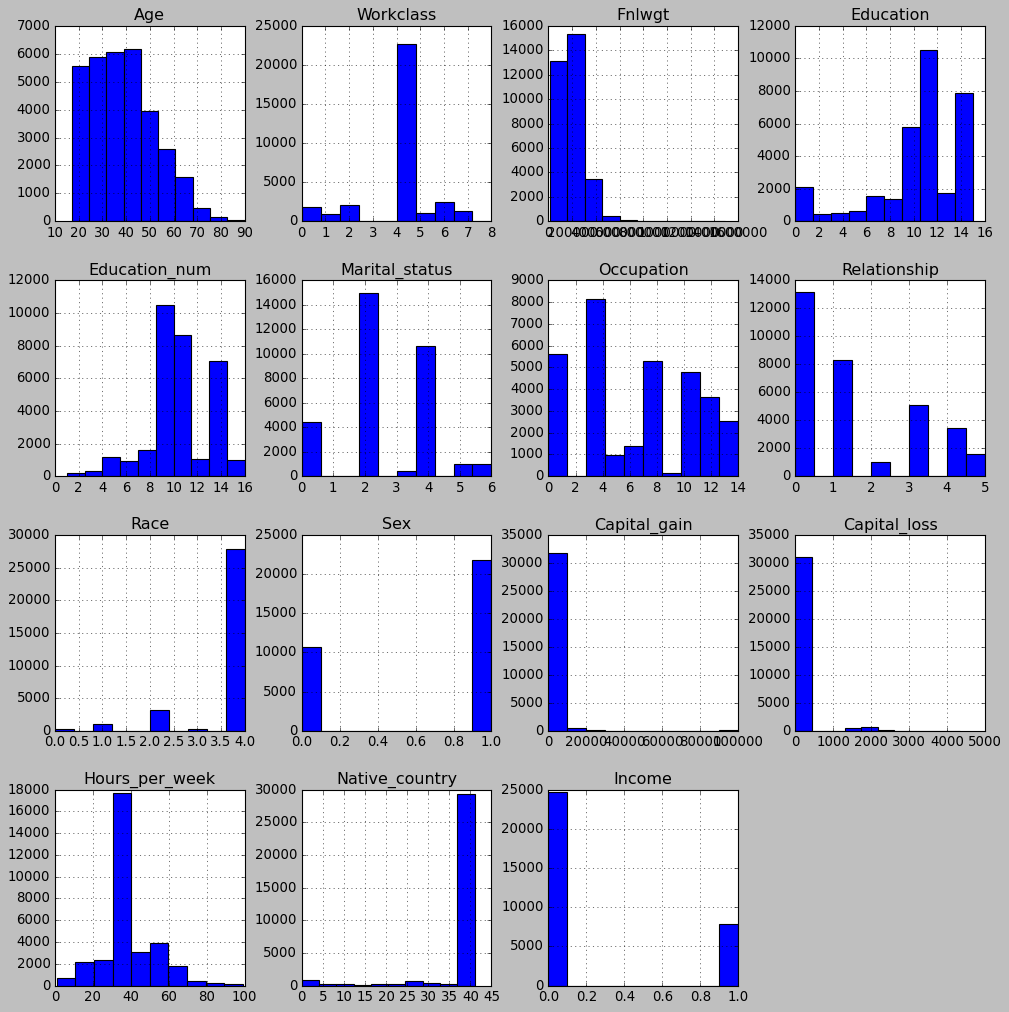

In [102]:
plt.style.use('classic')
df.hist(figsize=(15,15))
plt.show()

Findings--Histogram for all dataset columns after applying enconding and converting object datatype to numeric datatype values.

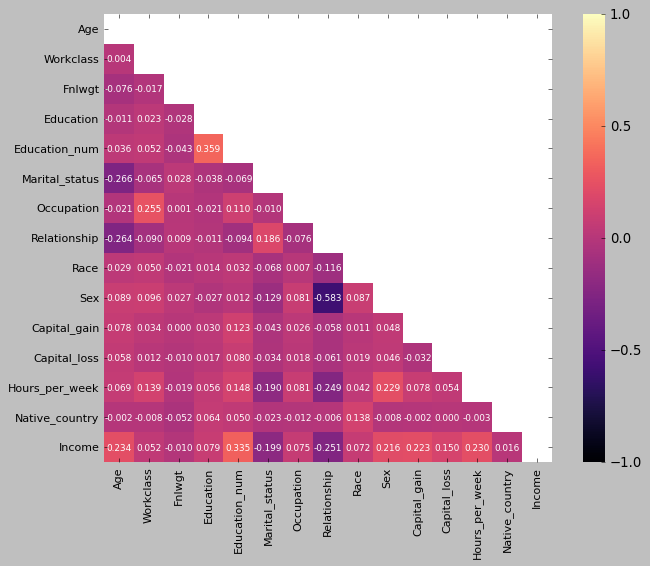

In [104]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Findings--In the correlation details we can determine that there is no multi colinearity issue between our columns.

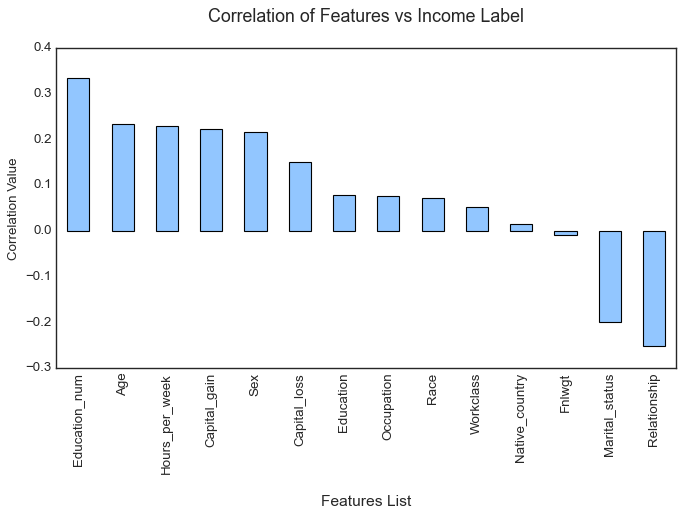

In [106]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Findings--The heatmap was not able to give us a clear picture on positive and negative correlation columns so generated above bar plot and we see that columns relationship and marital status are the only one's negatively correlated rest all the other feature columns are positively correlated with our label column.

In [108]:
# Using Z Score to remove outliers

In [109]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27399, 15)
Percentage of data loss post outlier removal:  15.788664863535775


In [110]:
# Z score method to remove the outliers.

In [111]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [112]:
# By skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

In [113]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [114]:
# Applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

In [115]:
df.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt            -0.955214
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       3.111491
Capital_loss      24.838742
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

In [116]:
# Reduce the skewness from numerical columns and that can be seen above while we have ignored the skewness and outlier details for our categorical data.

Splitting the dataset into features and Target

In [117]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [118]:
# Dataset divided into features and labels where X represents all the feature columns and Y represents the target label column.

SMOTE---Resolving the class imbalance issue in our label column

In [119]:
Y.value_counts()

0    21263
1     6136
Name: Income, dtype: int64

In [120]:
# Listing the values of  label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [121]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [122]:
Y.value_counts()

0    21263
1    21263
Name: Income, dtype: int64

In [123]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.775117   1.532358 -1.137764  -0.433694       1.023033       -0.315446   
1 -0.173175   0.061679  0.524283   0.133359      -0.632884       -1.847218   
2  1.012189   0.061679  0.672407  -2.701906      -1.460843       -0.315446   
3 -0.252199   0.061679  1.009033   0.416886       1.437012       -0.315446   
4  0.696092   0.061679  0.004734  -1.284273      -2.288802        0.450441   

   Occupation  Relationship      Race       Sex  Capital_gain  Capital_loss  \
0   -0.652883     -0.729990  0.306670  0.606940     -0.385127     -0.033631   
1   -0.174556     -0.107932  0.306670  0.606940     -0.385127     -0.033631   
2   -0.174556     -0.729990 -3.497121  0.606940     -0.385127     -0.033631   
3   -0.652883      2.380302  0.306670 -1.691141     -0.385127     -0.033631   
4    0.303770     -0.107932 -3.497121 -1.691141     -0.385127     -0.033631   

   Hours_per_week  Native_country  
0       -2.648904        0.175142  
1       -0.149207        0.175142  
2       -0.149207        0.175142  
3       -0.149207        0.175142  
4       -2.371160       -6.133703

In [124]:
# Scaling feature data to ensure that there is no issue with the data biasness over a particular column.

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
LR = LogisticRegression()

In [126]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 77.61474793077502 on Random State 841


In [127]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 77.72160827651071 on Random State 186


In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9085351516576534  on Random_state  24


In [130]:
# Best random_state value as 36. We will create our train_test_split using this random_state

In [131]:
#Feature importance bar graph

Importance
Features                  
Relationship         0.160
Marital_status       0.156
Age                  0.136
Fnlwgt               0.123
Occupation           0.073
Education_num        0.067
Hours_per_week       0.066
Capital_gain         0.063
Education            0.050
Workclass            0.046
Sex                  0.039
Race                 0.014
Native_country       0.006
Capital_loss         0.000

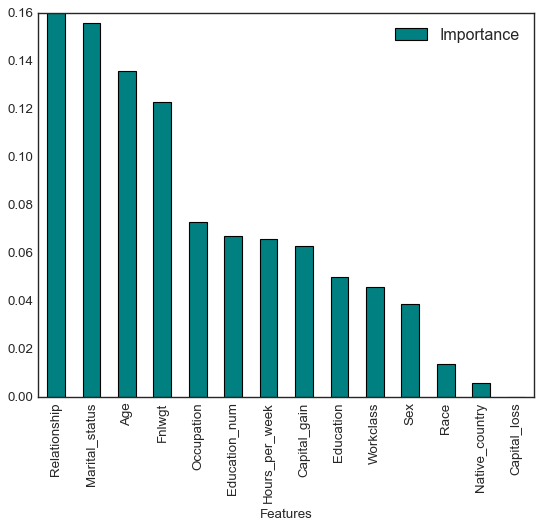

In [132]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [133]:
# By RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

In [134]:
# Importing required libraries
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [135]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=36)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [136]:
# Logistic Regression

In [137]:
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 76.0169292264284

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      4218
           1       0.76      0.78      0.77      4288

    accuracy                           0.76      8506
   macro avg       0.76      0.76      0.76      8506
weighted avg       0.76      0.76      0.76      8506

Cross Validation Score: 76.54378048734974

Accuracy Score - Cross Validation Score is -0.5268512609213332


In [138]:
# Naive Bayes

In [139]:
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 76.93392899130026

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75      4218
           1       0.74      0.84      0.79      4288

    accuracy                           0.77      8506
   macro avg       0.77      0.77      0.77      8506
weighted avg       0.77      0.77      0.77      8506

Cross Validation Score: 77.47264392544848

Accuracy Score - Cross Validation Score is -0.5387149341482171


In [188]:
# SVC Classifier

In [189]:
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 83.41170938161298

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4218
           1       0.80      0.90      0.85      4288

    accuracy                           0.83      8506
   macro avg       0.84      0.83      0.83      8506
weighted avg       0.84      0.83      0.83      8506

Cross Validation Score: 84.04041052461776

Accuracy Score - Cross Validation Score is -0.6287011430047755


In [190]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 76.08746766988008

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      4218
           1       0.74      0.80      0.77      4288

    accuracy                           0.76      8506
   macro avg       0.76      0.76      0.76      8506
weighted avg       0.76      0.76      0.76      8506

Cross Validation Score: 76.7953883367317

Accuracy Score - Cross Validation Score is -0.7079206668516207


In [191]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 80.41382553491653

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      4218
           1       0.75      0.92      0.83      4288

    accuracy                           0.80      8506
   macro avg       0.82      0.80      0.80      8506
weighted avg       0.82      0.80      0.80      8506

Cross Validation Score: 81.17626082111282

Accuracy Score - Cross Validation Score is -0.7624352861962933


In [192]:
# Decision Tree Classifier

In [145]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 84.85774747237245

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4218
           1       0.85      0.86      0.85      4288

    accuracy                           0.85      8506
   macro avg       0.85      0.85      0.85      8506
weighted avg       0.85      0.85      0.85      8506

Cross Validation Score: 85.52668275932899

Accuracy Score - Cross Validation Score is -0.6689352869565397


In [146]:
# KNeighbors Classifier

In [147]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 84.77545262167881

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      4218
           1       0.81      0.91      0.86      4288

    accuracy                           0.85      8506
   macro avg       0.85      0.85      0.85      8506
weighted avg       0.85      0.85      0.85      8506

Cross Validation Score: 85.31021447253127

Accuracy Score - Cross Validation Score is -0.5347618508524619


In [148]:
# SGD Classifier

In [149]:
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 75.95814719021867

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      4218
           1       0.75      0.78      0.77      4288

    accuracy                           0.76      8506
   macro avg       0.76      0.76      0.76      8506
weighted avg       0.76      0.76      0.76      8506

Cross Validation Score: 76.20516140144116

Accuracy Score - Cross Validation Score is -0.247014211222492


In [150]:
# Random Forest Classifier

In [202]:
model = RandomForestClassifier(random_state=36)
classifier(model, X, Y)

Accuracy Score: 89.78368210674817

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4218
           1       0.89      0.91      0.90      4288

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 89.6159615103106

Accuracy Score - Cross Validation Score is 0.16772059643757586


In [203]:
model = RandomForestClassifier()
classifier(model, X, Y)

Accuracy Score: 89.84246414295791

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4218
           1       0.89      0.91      0.90      4288

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 89.59714738830135

Accuracy Score - Cross Validation Score is 0.24531675465655667


In [153]:
# ExtraTrees Classifier

In [154]:
model = ExtraTreesClassifier(random_state=36)
classifier(model, X, Y)

Accuracy Score: 90.042323066071

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4218
           1       0.89      0.92      0.90      4288

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 90.28138134813162

Accuracy Score - Cross Validation Score is -0.2390582820606113


In [155]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 90.12461791676463

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4218
           1       0.89      0.92      0.90      4288

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506

Cross Validation Score: 90.29079006788858

Accuracy Score - Cross Validation Score is -0.1661721511239449


In [156]:
# AdaBoost Classifier

In [157]:
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 85.41029861274394

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4218
           1       0.83      0.89      0.86      4288

    accuracy                           0.85      8506
   macro avg       0.86      0.85      0.85      8506
weighted avg       0.86      0.85      0.85      8506

Cross Validation Score: 85.64419734563685

Accuracy Score - Cross Validation Score is -0.23389873289291074


In [158]:
# Gradient Boosting Classifier

In [159]:
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 86.56242652245474

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      4218
           1       0.84      0.90      0.87      4288

    accuracy                           0.87      8506
   macro avg       0.87      0.87      0.87      8506
weighted avg       0.87      0.87      0.87      8506

Cross Validation Score: 86.84818614739977

Accuracy Score - Cross Validation Score is -0.2857596249450296


In [160]:
# Comparing ExtraTreesClassifier gives the best results Accuracy Score comparing all the models.

In [161]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=36)

In [162]:
x_test.shape

(8506, 14)

In [163]:
y_test.shape

(8506,)

In [164]:
x_train.shape

(34020, 14)

In [165]:
y_train.shape

(34020,)

In [166]:
# ExtraTreesClassifier?

In [167]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10],
              'random_state' : [None, 36]}

In [168]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [169]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10], 'random_state': [None, 36]})

In [170]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_features': 'log2',
 'n_jobs': 5,
 'random_state': None}

In [171]:
# We got the best parameters using Gridsearch CV

In [172]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'log2', n_jobs = 10, random_state = None)   # final model with best parameters

In [173]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [174]:
final_predc = final_modelc.predict(x_test)

In [175]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  90.21866917470021


In [176]:
# We successfully performed the Hyper Parameter Tuning on the Final Model.

In [177]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 90.34957735681408


In [178]:
# We got final accuracy score of 90.70118% and Cross Validation Score of 90.31576% which is good

In [179]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4218
           1       0.89      0.92      0.90      4288

    accuracy                           0.90      8506
   macro avg       0.90      0.90      0.90      8506
weighted avg       0.90      0.90      0.90      8506



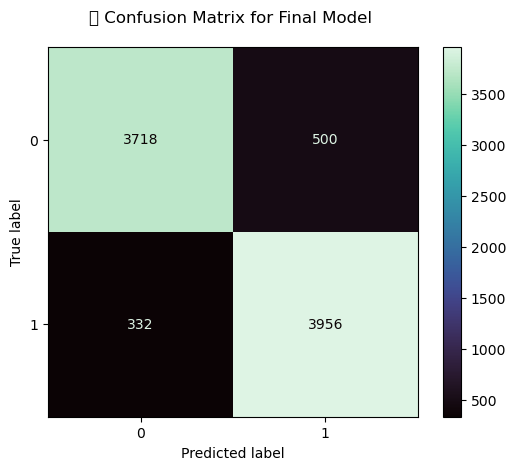

In [180]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

In [181]:
# By confusion matrix we are able to understand the number of times we got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

In [182]:
# AUC ROC curve

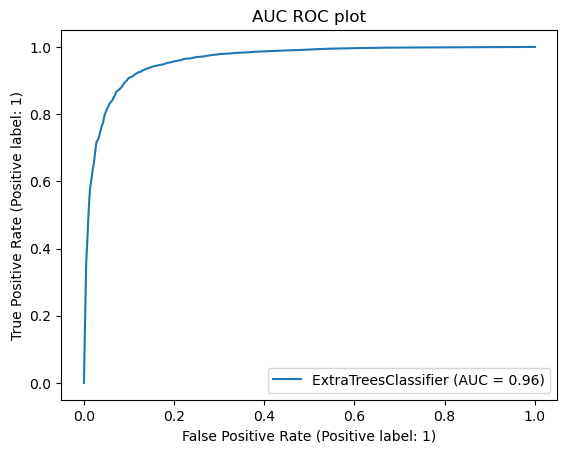

In [183]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

In [184]:
# We got final accuracy score of 90.70118% and Cross Validation Score of 90.31576% and also AUC score is 0.97 which is really good.

In [185]:
# pickeling or serialization of a file
import pickle
filename = 'Census_Income_Project_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

In [186]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

original  predicted
0            1          1
1            0          0
2            1          1
3            1          1
4            0          0
5            1          1
6            1          1
7            1          1
8            0          1
9            0          0
10           0          1
11           1          1
12           0          0
13           0          0
14           0          0
15           1          1
16           1          1
17           0          0
18           0          1
19           1          1
20           1          1
21           1          0
22           0          0
23           1          1
24           0          0
25           0          0
26           0          0
27           0          1
28           0          0
29           0          0
30           1          0
31           1          1
32           1          1
33           0          0
34           0          0
35           1          1
36           1          1
37           1          1
38           0          0
39           0          0
40           1          1
41           0          0
42           1          1
43           0          0
44           0          0
45           0          0
46           0          0
47           1          1
48           1          1
49           0          0
50           1          1
51           1          1
52           0          0
53           0          0
54           1          1
55           1          1
56           1          1
57           1          1
58           0          0
59           1          1
60           1          1
61           0          0
62           0          0
63           0          1
64           0          0
65           1          1
66           0          0
67           1          1
68           1          1
69           1          1
70           1          1
71           1          1
72           1          0
73           1          1
74           1          1
75           1          1
76           1          1
77           1          0
78           1          1
79           0          0
80           0          0
81           1          1
82           1          1
83           0          0
84           0          1
85           0          0
86           1          1
87           0          0
88           0          0
89           0          0
90           1          1
91           0          0
92           1          0
93           1          1
94           0          0
95           1          1
96           1          1
97           1          1
98           0          0
99           0          0
100          0          0
101          1          1
102          1          1
103          0          0
104          0          0
105          0          0
106          0          0
107          0          1
108          1          1
109          0          0
110          0          0
111          1          1
112          1          1
113          1          0
114          1          1
115          0          1
116          1          0
117          0          0
118          0          0
119          0          0
120          0          0
121          0          0
122          0          0
123          1          1
124          1          1
125          0          0
126          1          1
127          0          1
128          1          1
129          0          0
130          1          1
131          0          0
132          0          0
133          1          1
134          1          1
135          0          0
136          0          0
137          0          0
138          1          1
139          1          1
140          0          0
141          0          0
142          1          1
143          0          0
144          0          0
145          1          1
146          1          1
147          0          1
148          1          1
149          1          1
150          0          0
151          0          0
152          1          0
15

Predicted the "Income" using the final Model ---> Saving the comparison file as a csv file.

In [200]:
 df_comparisonc.to_csv('Census_Income_Project_Prediction.csv')

In [201]:
# Saved the file as a csv.